# Pandas Tutorial
## 201921507 허진아
Panel data analysis 혹은 python data analysis의 약자

- "관계형", 혹은 "테이블 형" 데이터를 만들고 조작하기 위한 파이썬 라이브러리
- NumPy 라이브러리 기반으로 구축
- 오픈소스(http://pandas.pydata.org)

Pandas의 장점

- CSV, 엑셀, Database(SQL), Json 등 다양한 소스에서 데이터를 가져오고 또한 해당 형식으로 데이터를 내보낼 수 있는 입출력 기능.
- 데이터의 삽입, 삭제, 병합, 결합, 슬라이싱, 인덱싱, 등 데이터를 필요한 대로 조작(manipulation)할 수 있다.
- 누락 데이터 처리가 용이(무시하거나, 0으로 변환하거나, 평균값에 맞추거나.. 등등)
- 통계분석이나 머신 러닝 분석이 가능하도록 연구모델을 설정할 수 있음.
- Statsmodel, SciPy 등 다양한 데이터 분석 패키지와 쉽게 연동되어 사용할 수 있음.
NumPy처럼 빠른 속도로 데이터를 처리할 수 있음.

다음과 같이 import해서 쓴다.

In [1]:
import pandas as pd

## 시리즈(Series)와 데이터프레임(data frame)
Series: 인덱스(index)가 있는 1차원 배열

In [2]:
s = pd.Series([1, 3, 5, 7, 9])
print(s)
print(s[2]) #indexing

0    1
1    3
2    5
3    7
4    9
dtype: int64
5


In [3]:
# dictionary를 이용해 만들기
dic = {'a':1, 'b':3, 'c':5}
s = pd.Series(dic)
print(s)
print(s['b']) #indexing

a    1
b    3
c    5
dtype: int64
3


Series의 두 속성: index, values

In [4]:
print(s.values)
print(s.index)

[1 3 5]
Index(['a', 'b', 'c'], dtype='object')


index를 부여하는 다른 방법

In [5]:
s = pd.Series([1,3,5,7,9], index=['LGT','DOO','HWE','LOT','SKW'])
#print(s)
#print(s['LOT'])
print(s[:'LOT']) # 슬라이싱에서 어디까지 나오는지 주목

LGT    1
DOO    3
HWE    5
LOT    7
dtype: int64


데이터 프레임 만들기: 데이터 프레임은 우리에게 친숙한 2차원 표와 같은 형태로 생각하면 된다. 행(row)과 열(column)으로 이루어져 있으며, 각 열에는 name이 있고 행에는 index가 있다.

In [6]:
score={'학번':[201524213,201621223,201621233],
       '이름':['오지환','박용택','정성훈'],
       'Quiz':[15,20,10],
       '중간고사':[20,20,15]}

score_df= pd.DataFrame(score)
score_df

,학번,이름,Quiz,중간고사
0,201524213,오지환,15,20
1,201621223,박용택,20,20
2,201621233,정성훈,10,15


하나의 열은 Series이며 따라서 데이터 프레임은 index를 공유하는 열 혹은 Series의 집합이라고 생각할 수 있다.

In [7]:
print(type(score_df['학번']))
score_df['학번']

<class 'pandas.core.series.Series'>


0    201524213
1    201621223
2    201621233
Name: 학번, dtype: int64

## 데이터 프레임 다루기

In [8]:
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa'],
   'Age':[26,27,25,24,31,27,25,33,42,32,51,47],
   'Score':[89,87,67,55,47,72,76,79,44,92,99,69]}
 
df = pd.DataFrame(d)
df

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [9]:
df['Age']

0     26
1     27
2     25
3     24
4     31
5     27
6     25
7     33
8     42
9     32
10    51
11    47
Name: Age, dtype: int64

### 행과 열을 추출하기
두개 이상의 열을 반환하고 싶으면 아래와 같이 리스트 형태로 인덱싱을 한다.

In [10]:
df[['Name', 'Age']]

,Name,Age
0,Alisa,26
1,Bobby,27
2,Cathrine,25
3,Madonna,24
4,Rocky,31
5,Sebastian,27
6,Jaqluine,25
7,Rahul,33
8,David,42
9,Andrew,32


인덱싱을 할 [] 안에 하나의 값을 쓰느냐, 아니면 리스트 형태를 쓰느냐에 따라 반환되는 값의 타입이 달라진다. 하나의 값을 쓰는 경우는 시리즈를, 리스트 형태를 쓰면 데이터프레임을 반환한다.

In [11]:
type(df['Name'])

pandas.core.series.Series

In [12]:
type(df[['Name']])

pandas.core.frame.DataFrame

[] 안에 열의 이름이 아닌 숫자를 쓰면 행을 반환하는 것이 가능하다. 단 이 경우는 슬라이싱만 가능하다.

In [13]:
df[0:3]  #df[2]는 에러 발생

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67


## loc, iloc을 이용한 인덱싱과 슬라이싱
loc과 iloc 모두 행(row)이나 열(column)을 인덱싱하기 위한 함수이다.  
iloc은 numpy의 인덱싱과 유사하게 작동한다. 저장된 순서에 따라 0부터 정수로 인덱싱, 슬라이싱이 가능하다.  
iloc[4]와 같이 값을 하나만 주는 경우에는 행을 대상으로 작동하고, iloc[:, 3]와 같이 사용하면 열에 대해 인덱싱이 가능하다.  
loc은 데이터 프레임에 정의된 index에 대해 인덱싱이 작동한다.  
슬라이싱의 경우 loc은 index 값의 크기와 무관하게 순서에 따라 슬라이싱이 작동한다.

**iloc은 위치를 보고 loc은 라벨을 본다.**

In [14]:
df=df.reindex([1,4,6,2,3,5,9,8,0,7,11,10]) # 일부러 순차가 아닌 인덱스를 부여
df

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,24,55
5,Sebastian,27,72
9,Andrew,32,92
8,David,42,44
0,Alisa,26,89
7,Rahul,33,79


In [15]:
df.loc[:6]

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76


**iloc**과 **loc**의 중요한 차이점 하나는, loc은 인덱싱하는 값을 포함하여 결과를 반환한다는 것이다.

In [16]:
df.iloc[:6]

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,24,55
5,Sebastian,27,72


In [17]:
# sort the pandas dataframe by index ascending
 
df1=df.sort_index()
df1

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [18]:
df1.loc[:6]

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76


In [19]:
df1.iloc[:6]

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72


In [20]:
# sort the pandas dataframe by index descending
 
df2=df.sort_index(ascending=False)
df2

,Name,Age,Score
11,Teresa,47,69
10,Ajay,51,99
9,Andrew,32,92
8,David,42,44
7,Rahul,33,79
6,Jaqluine,25,76
5,Sebastian,27,72
4,Rocky,31,47
3,Madonna,24,55
2,Cathrine,25,67


## Ioc와 iloc을 이용해 열(column) 추출하기

In [21]:
df2.iloc[:, 2]

11    69
10    99
9     92
8     44
7     79
6     76
5     72
4     47
3     55
2     67
1     87
0     89
Name: Score, dtype: int64

In [22]:
df2.loc[:, ['Name', 'Age']]

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


In [23]:
df2.iloc[:, :2]

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


In [24]:
df2.loc[:, :'Age']

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


## CSV 파일에서 읽어오기
CSV 파일은 데이터 분석에서 가장 많이 사용하는 데이터 파일 포맷으로 pandas에서 쉽게 읽어들이는 것이 가능하다.  

미국대학농구(NCAA)의 1985부터 2016년 까지의 자료를 예제로 사용. CSV 파일로 되어 있으며 pd.read_csv() 를 이용하여 읽어들이면 dataframe 변수 형태로 내용을 반환한다.  

In [30]:
df = pd.read_csv('RegularSeasonCompactResults.csv')

### 데이터 프레임 함수들
위 예에서 df는 데이터프레임을 가리키는 변수이다. 데이터프레임은 보통 많은 수의 행을 갖고 있으므로, 간단하게 첫 몇 줄(보통은 다섯 줄)만 보고 싶다면 head() 함수를 쓰고, 마지막 몇 줄을 보고 싶다면 tail() 함수를 아래와 같이 사용한다.

In [31]:
df.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [32]:
df.tail()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
150679,2017,132,1276,71,1458,56,N,0
150680,2017,132,1343,71,1463,59,N,0
150681,2017,132,1348,70,1433,63,N,0
150682,2017,132,1374,71,1153,56,N,0
150683,2017,132,1407,59,1402,53,N,0


데이터프레임의 **shape** 속성은 행과 열의 수를 나타낸다.

In [33]:
df.shape

(150684, 8)

**columns** 속성과 **tolist()** 함수를 이용하면 열의 이름들을 리스트로 반환할 수 있다.

In [34]:
df.columns.tolist()

['Season', 'Daynum', 'Wteam', 'Wscore', 'Lteam', 'Lscore', 'Wloc', 'Numot']

각 열에 대해 평균, 최소값 등의 다양한 통계량을 보고 싶다면 **describe()** 함수를 사용한다.

In [35]:
df.describe()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Numot
count,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000,150684.000000
mean,2002.127107,75.065322,1286.788226,76.673515,1282.773373,64.572815,0.045506
std,9.508740,33.383080,104.562833,12.141706,104.780157,11.376177,0.250971
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1994.000000,47.000000,1198.000000,68.000000,1191.000000,57.000000,0.000000
50%,2003.000000,77.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2010.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2017.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


**max()** 함수를 이용하면 원하는 열이나 전체 열의 최대값을 구할 수 있다.

In [36]:
df.max()

Season    2017
Daynum     132
Wteam     1464
Wscore     186
Lteam     1464
Lscore     150
Wloc         N
Numot        6
dtype: object

특정 열의 최대값을 구하고 싶으면 아래와 같이 쓴다. 여기서는 이긴 팀의 점수: Wscore.

In [37]:
df['Wscore'].max()

186

진 팀의 점수(Lscore) 평균을 구하고 싶다면 아래와 같이 쓴다.

In [38]:
df['Lscore'].mean()

64.572814631945

이긴 팀의 점수가 최대인 행의 위치(index)를 알고 싶다면 아래와 같이 **argmax()** 함수를 사용한다.

In [39]:
df['Wscore'].argmax()

24970

향후에는 argmax 대신 idxmax를 쓰도록 친절하게 권장하므로 이후부터는 idxmax로 고쳐서 쓴다.

In [40]:
df.loc[24970] #반환된 index 값을 이용해 값을 출력

Season    1991
Daynum      68
Wteam     1258
Wscore     186
Lteam     1109
Lscore     140
Wloc         H
Numot        0
Name: 24970, dtype: object

In [41]:
df.loc[df['Wscore'].idxmax()] #위 과정을 하나로 합침

Season    1991
Daynum      68
Wteam     1258
Wscore     186
Lteam     1109
Lscore     140
Wloc         H
Numot        0
Name: 24970, dtype: object

유용하게 쓰이는 함수 중 하나는 **value_counts()** 함수로, 특정 열에 사용된 값들에 대해 횟수를 계산하여 보여준다. 아래 예에서는 Season 열에서 각 시즌(연도)의 값이 나타난 수를 연도 별로 보여준다.

In [42]:
df['Season'].value_counts()

2017    5395
2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
2002    4555
2000    4519
2001    4467
1999    4222
1998    4167
1997    4155
1992    4127
1991    4123
1996    4122
1995    4077
1994    4060
1990    4045
1989    4037
1993    3982
1988    3955
1987    3915
1986    3783
1985    3737
Name: Season, dtype: int64

### 데이터프레임 값 추출
데이터프레임 변수에 열의 이름을 이용하여 인덱싱을 하면 특정 열의 값만을 추출할 수 있다. 이긴 팀의 점수만을 추출하고 싶다면 아래와 같이 인덱싱을 한다.

In [43]:
Wscore = df['Wscore']
Wscore.head() # 갯수가 너무 많으므로 뒤에 head()함수를 써서 앞부분만 추출

0    81
1    77
2    63
3    70
4    86
Name: Wscore, dtype: int64

In [44]:
df.loc[[df['Wscore'].idxmax()]]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
24970,1991,68,1258,186,1109,140,H,0


위 결과와 아래 결과의 차이를 비교.

In [45]:
df.loc[df['Wscore'].idxmax()]

Season    1991
Daynum      68
Wteam     1258
Wscore     186
Lteam     1109
Lscore     140
Wloc         H
Numot        0
Name: 24970, dtype: object

위 예에서 좀 더 나아가, 이긴 팀의 점수가 가장 높은 경기에서 진 팀의 점수만 가져오고 싶다면 아래와 같이 쓴다.

In [46]:
df.loc[[df['Wscore'].idxmax()]]['Lscore']

24970    140
Name: Lscore, dtype: int64

In [47]:
df.loc[df['Wscore'].idxmax()]['Lscore']

140

아래와 같이 loc에 행과 열을 동시에 인덱싱하는 것도 가능하다.

In [48]:
df.loc[df['Wscore'].idxmax(), 'Lscore']

140

출력되는 모양을 보면 데이터프레임인지 아니면 시리즈인지 알 수 있다. 위의 예는 **Series** 임을 알 수 있다. 보다 명확하게 데이터형을 알고 싶다면 아래와 같이 **type()** 함수를 써서 확인한다.

In [49]:
type(df.loc[[df['Wscore'].idxmax()]]['Lscore'])

pandas.core.series.Series

In [50]:
type(df.loc[[df['Wscore'].idxmax()]])

pandas.core.frame.DataFrame

## 정렬(Sorting)
진 팀의 점수에 따라 오름차순으로 정렬하고 싶다면 아래와 같이 **sort_values()** 함수를 사용한다.

In [52]:
df.sort_values('Lscore').head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
100027,2008,66,1203,49,1387,20,H,0
49310,1997,66,1157,61,1204,21,H,0
89021,2006,44,1284,41,1343,21,A,0
103660,2009,26,1326,59,1359,22,H,0
85042,2005,66,1131,73,1216,22,H,0


## 조건에 따라 행 추출
이긴 팀의 점수가 150보다 큰 행만 추출하기 위한 두 단계

1. 먼저 df['Wscore'] > 150 는 각 행에 대해 Wscore가 150보다 큰 지의 여부를 True/False Series로 반환한다.
2. 이 Series를 이용하여 df를 다음과 같이 인덱싱하면 시리즈에서 True인 행들만 추출할 수 있다:  
   **df[df['Wscore'] > 150].**

In [53]:
print(type(df['Wscore'] > 150)) # True/False 시리즈로 반환되는지 확인
(df['Wscore'] > 150).head() # 시리즈의 앞부분을 확인

<class 'pandas.core.series.Series'>


0    False
1    False
2    False
3    False
4    False
Name: Wscore, dtype: bool

In [54]:
df[df['Wscore'] > 150].head() # Boolean Series를 이용해 조건이 True인 행들만 추출

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0


아래와 같이 두가지 이상의 조건을 부여할 수 있다.

In [55]:
df[(df['Wscore'] > 150) & (df['Lscore'] < 100)]

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


## 그룹화(Grouping)
**groupby()** 는 특정 속성 별로 그룹화 함수를 적용할 수 있도록 한다. 예를 들어 df['Wscore'].mean()은 모든 행에 있는 Wscore의 평균을 계산하지만, Wteam 별로 Wscore의 평균을 구하고 싶다면, 다시 말해서 Wteam 값이 같은 행들에 대해 Wscore의 평균을 구하고 싶다면 **groupby('Wteam')**을 아래와 같이 사용한다.

In [56]:
df.groupby('Wteam')['Wscore'].mean().head()

Wteam
1101    76.851852
1102    70.213166
1103    76.018416
1104    75.738854
1105    75.049724
Name: Wscore, dtype: float64

아래는 이긴 팀 별로, home, away, neutral에서 각각 몇 번 이겼는지를 구하는 예이다.

In [57]:
df.groupby('Wteam')['Wloc'].value_counts().head(9)

Wteam  Wloc
1101   H        17
       A         7
       N         3
1102   H       213
       A        73
       N        33
1103   H       336
       A       160
       N        47
Name: Wloc, dtype: int64

**values** 속성은 데이터프레임의 값들을 Numpy 형태로 반환한다.

In [58]:
print(type(df.values))
print(df.values.shape)
df.values

<class 'numpy.ndarray'>
(150684, 8)


array([[1985, 20, 1228, ..., 64, 'N', 0],
       [1985, 25, 1106, ..., 70, 'H', 0],
       [1985, 25, 1112, ..., 56, 'H', 0],
       ...,
       [2017, 132, 1348, ..., 63, 'N', 0],
       [2017, 132, 1374, ..., 56, 'N', 0],
       [2017, 132, 1407, ..., 53, 'N', 0]], dtype=object)

따라서 **values** 속성은 Numpy ndarray와 동일한 방법으로 사용할 수 있다.

In [59]:
df.values[0, 0]

1985

## 데이터프레임 순환
**iterrows()** 함수를 사용하면 데이터프레임의 행 단위로 순환이 가능하다. 각 행은 시리즈 형태로 반환된다.

In [60]:
for index, row in df.iterrows():
    print('#Data type of row:', type(row))
    print(row)
    if index == 1:
        break

#Data type of row: <class 'pandas.core.series.Series'>
Season    1985
Daynum      20
Wteam     1228
Wscore      81
Lteam     1328
Lscore      64
Wloc         N
Numot        0
Name: 0, dtype: object
#Data type of row: <class 'pandas.core.series.Series'>
Season    1985
Daynum      25
Wteam     1106
Wscore      77
Lteam     1354
Lscore      70
Wloc         H
Numot        0
Name: 1, dtype: object


## 데이터 클리닝
데이터 처리에서 가장 지루하고 어려운 작업 중 하나는 데이터 클리닝이다. 대표적인 클리닝은 결측값(missing value)의 처리인데, pandas는 결측값 여부를 반환하는 **isnull** 함수가 있다. 아래와 같이 **sum()** 함수와 결합하면 각 열의 결측값 수를 알 수 있다:

In [61]:
df.isnull().sum()

Season    0
Daynum    0
Wteam     0
Wscore    0
Lteam     0
Lscore    0
Wloc      0
Numot     0
dtype: int64

위 예에서는 결측값이 없으므로 일부러 결측값을 넣은 예제를 본다. 아래 예에서 NaN은 Not a Number의 줄임말로 숫자여야 하는 값이 비어있거나 숫자가 아닌 경우를 나타낸다.

In [62]:
df1 = pd.read_csv('sample.csv')
df1

FileNotFoundError: [Errno 2] No such file or directory: 'sample.csv'

In [63]:
df1.isnull().sum()

Name     0
Age      0
Score    0
dtype: int64

결측치를 처리하는 일반적인 방법으로 다음과 같은 두 함수가 있다.

- **dropna()** - 결측치가 있는 모든 행을 없앤다.
- **fillna()** - 결측치를 정해진 값으로 바꾼다.

아래 예에서는 결측치를 0으로 바꾼다.

In [64]:
df1.fillna(0)

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [65]:
df1.dropna()

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


## 데이터 시각화
matplotlib을 이용해 아래와 같이 데이터프레임으로부터 바로 그래프를 그리는 것이 가능

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

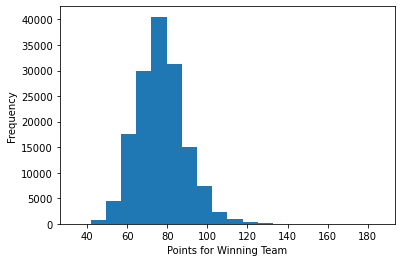

In [67]:
ax = df['Wscore'].plot.hist(bins=20)
ax.set_xlabel('Points for Winning Team')
plt.show()

## CSV 파일로 데이터 프레임 저장
**to_csv()** 함수를 사용하면 데이터프레임을 csv로 쉽게 저장할 수 있다. 아래 예는 위에서 사용한 결측치 있는 데이터프레임에서 결측치를 0으로 바꾸고 저장하는 예이다.

In [68]:
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv')
df2

,Unnamed: 0,Name,Age,Score
0,0,Alisa,26,89
1,1,Bobby,27,87
2,2,Cathrine,25,67
3,3,Madonna,24,55
4,4,Rocky,31,47
5,5,Sebastian,27,72
6,6,Jaqluine,25,76
7,7,Rahul,33,79
8,8,David,42,44
9,9,Andrew,32,92


위 예를 보면 첫 열에 Unnamed가 있는 것을 볼 수 있는데, 저장할 때 index가 함께 저장되고 읽어들일때는 새로운 인덱스를 자동으로 할당했기 때문이다. 이것을 해결하는 방법으로 첫째 저장할 때 인덱스를 제외하고 저장하거나, 둘째 읽어들일때 첫 열을 인덱스로 읽어들이는 방법이 있다.

In [69]:
#첫째 방법
df1.fillna(0).to_csv('test.csv', index=False) #인덱스를 저장하지 않음
df2 = pd.read_csv('test.csv')
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [70]:
#둘째 방법
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv', index_col=0) #첫 열을 인덱스로 저장
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


## 기타 유용한 함수들
직접 검색해 보세요.

- **drop()** - This function removes the column or row that you pass in (You also have the specify the axis).
- **agg()** - The aggregate function lets you compute summary statistics about each group
- **apply()** - Lets you apply a specific function to any/all elements in a Dataframe or Series
- **get_dummies()** - Helpful for turning categorical data into one hot vectors.
- **drop_duplicates()** - Lets you remove identical rows